In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\USER\Downloads/student-data.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
data.shape

(395, 31)

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [6]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [9]:
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [10]:
#Performing label encoding for features like school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher
# internet,romantic

In [11]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed'] 
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [12]:
x=data.drop(['passed'],axis=1)

In [13]:
y=data['passed']

In [14]:
#Performing one hot encoding for features like Mjob,Fjob,reason,guardian nominal variable
x=pd.get_dummies(x)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [15]:
x.dtypes

school               int32
sex                  int32
age                  int64
address              int32
famsize              int32
Pstatus              int32
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int32
famsup               int32
paid                 int32
activities           int32
nursery              int32
higher               int32
internet             int32
romantic             int32
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

In [16]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [17]:
x.shape

(395, 43)

# Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [19]:
x_train.shape

(316, 43)

In [20]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Logistic Regression

In [21]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [22]:
start_time=time.time()
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
end_time=time.time()

In [23]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.7215189873417721
precision score is : 0.7586206896551724
recall score is : 0.8461538461538461
f1 score is : 0.8
time_taken: 0.022801876068115234


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
start_time=time.time()
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
end_time=time.time()

In [25]:
acc_values

[0.620253164556962,
 0.6075949367088608,
 0.620253164556962,
 0.6075949367088608,
 0.6455696202531646,
 0.6329113924050633,
 0.6708860759493671,
 0.6455696202531646,
 0.6582278481012658,
 0.6582278481012658,
 0.6708860759493671,
 0.6708860759493671]

Text(0, 0.5, 'accuracy')

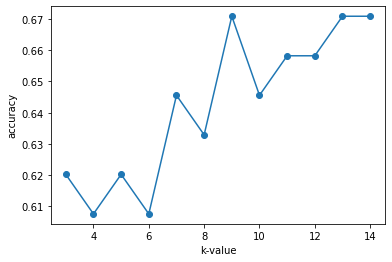

In [26]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')

In [27]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [28]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.6708860759493671
precision score is : 0.6805555555555556
recall score is : 0.9423076923076923
f1 score is : 0.7903225806451614
time_taken: 0.04997682571411133


# Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
start_time=time.time()
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
end_time=time.time()

In [31]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.6455696202531646
precision score is : 0.7222222222222222
recall score is : 0.75
f1 score is : 0.7358490566037735
time_taken: 0.009474039077758789


# SVM

In [32]:
#Linear classifier
from sklearn.svm import SVC

In [33]:
start_time=time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
end_time=time.time()

In [34]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.6835443037974683
precision score is : 0.7288135593220338
recall score is : 0.8269230769230769
f1 score is : 0.7747747747747747
time_taken: 0.024625062942504883


In [35]:
start_time = time.time()
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
end_time = time.time()
time_taken=end_time-start_time
print('time_taken:',time_taken)

time_taken: 0.015862703323364258


In [36]:
accuracy_score(y_test,y_pred)

0.6835443037974683

# Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
start_time=time.time()
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
end_time=time.time()

In [39]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.6835443037974683
precision score is : 0.6901408450704225
recall score is : 0.9423076923076923
f1 score is : 0.7967479674796748
time_taken: 0.15734553337097168


# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
start_time=time.time()
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
end_time=time.time()

In [41]:
print('accuracy score is :',accuracy_score(y_test,y_pred))
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
time_taken=end_time-start_time
print('time_taken:',time_taken)

accuracy score is : 0.6962025316455697
precision score is : 0.7258064516129032
recall score is : 0.8653846153846154
f1 score is : 0.7894736842105263
time_taken: 0.07752561569213867


Out of the above models, LogisticRegression model shown a much better performance than the other models. So we can give more preference to LogisticRegression for developing an efficient classifier model for our data.